In [3]:
!pip install wordcloud

!pip install sentence-transformers
!pip install tweet-preprocessor


import os
import pandas as pd
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

import re
import preprocessor as p

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/9d/06/059a7e33548acf6c7bd29f96b2e495571797b4397353bf79631559b97948/wordcloud-1.9.2-cp38-cp38-win_amd64.whl.metadata
   ---------------------------------------- 0.0/153.1 kB ? eta -:--:--
   ---------- ----------------------------- 41.0/153.1 kB 1.9 MB/s eta 0:00:01
   -------------------------------- ------- 122.9/153.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 153.1/153.1 kB 1.1 MB/s eta 0:00:00


In [4]:
os.chdir(r'C:/Users/Rahul/Downloads/Documents Clustering Using BERT')
df = pd.read_csv('train_E6oV3lV.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
    #set up punctuations we want to be replaced
    REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
    REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")
    tempArr = []
    for line in df:
        # send to tweet_processor
        tmpL = p.clean(line)
        # remove puctuation
        tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
        tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
        tempArr.append(tmpL)
    return tempArr

In [6]:
# cleaning the tweets
df['clean tweet'] = clean_tweets(df['tweet'])
df.head()

,id,label,tweet,clean tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for credit i cant use cause they dont o...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now


In [7]:
corpus = list(df['clean tweet'])
corpus = corpus[0:100]

In [8]:
corpus_embeddings = embedder.encode(corpus)

In [9]:
corpus_embeddings

array([[-1.0903802 , -0.43554926, -0.18660864, ..., -0.31698528,
         0.6723961 , -0.1649954 ],
       [-0.5190491 ,  0.0525205 , -0.12434583, ...,  0.42281637,
         0.56470025, -0.36229917],
       [-0.5740158 ,  0.2891446 ,  0.29484206, ..., -0.608961  ,
        -0.04336823, -0.14719638],
       ...,
       [-0.13383186, -1.2370157 ,  0.37747452, ..., -0.5058205 ,
         0.5441096 , -0.8855075 ],
       [-0.61183476, -0.52159095, -0.0430087 , ..., -0.5347253 ,
         0.19781384, -0.77683896],
       [-1.1217124 , -0.3185662 ,  0.32293463, ..., -0.5356316 ,
         0.23396918, -0.05576864]], dtype=float32)

In [10]:
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
cluster_assignment

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [12]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df.head()

,corpus,cluster
0,when a father is dysfunctional and is so selfi...,0
1,thanks for credit i cant use cause they dont o...,0
2,bihday your majesty,1
3,i love u take with u all the time in ur,0
4,factsguide society now,1


In [13]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['when a father is dysfunctional and is so selfish he drags his kids into his dysfunction', 'thanks for credit i cant use cause they dont offer wheelchair vans in pdx', 'i love u take with u all the time in ur', '2 2 huge fan fare and big talking before they leave chaos and pay disputes when they get there', 'camping tomorrow danny', 'the next school year is the year for exams cant think about that', 'consumer price index mom climbed from previous  to  in may', 'calls middle school build the wall chant ', 'people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them from there', 'product of the day happy man tool whos its the  time to open up &amp drink up', 'beautiful sign by vendor for 4500', 'people went to nightclub to have a good night and mans actions means those people are lost to their families forever', 'i have never had a chance to vote for a presidential candidate i was excited about and this cycle looks to be no differen

In [14]:
#word cloud
def word_cloud(pred_df,label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(width=800, height=500,
    random_state=21, max_font_size=110).generate(wc)
    fig7 = plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

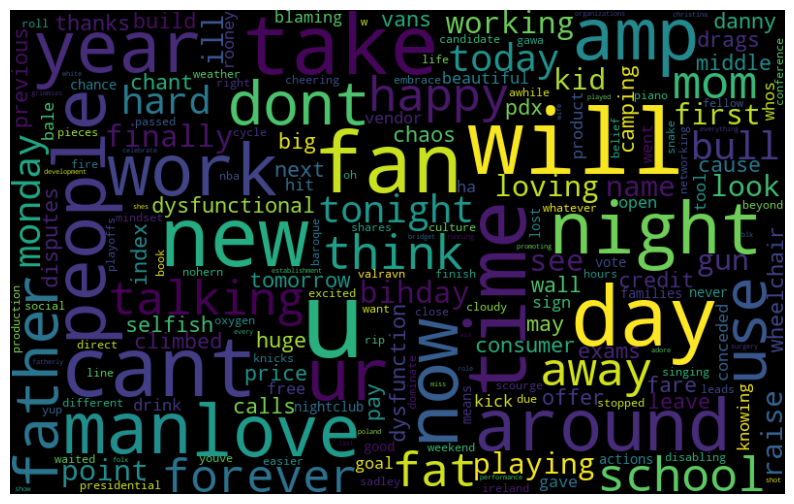

In [15]:
word_cloud(cluster_df,0)

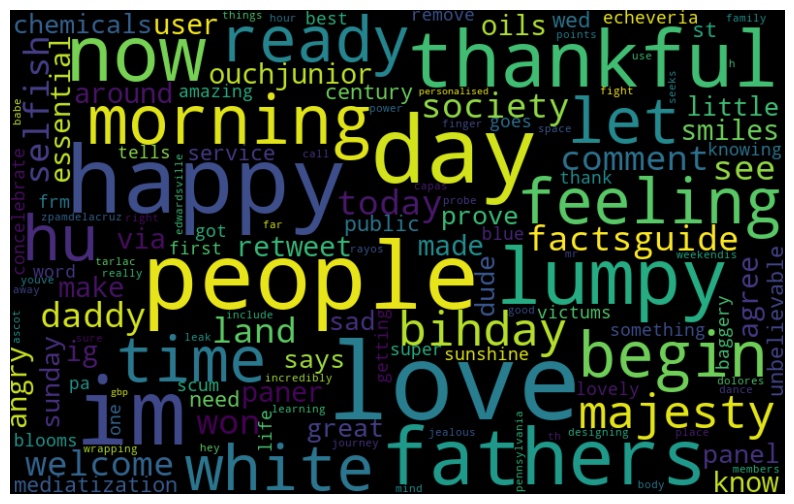

In [16]:
word_cloud(cluster_df,1)